In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

Leggo il file Excel e lo copio in lanci.

In [2]:
lanci = pd.read_excel('Lanci1.xlsx')
lanci.head()

,Lanciato,temp,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions
0,1,13.2,95.67,0.0,0.0,0.0,1019.7,0.0,2.0,0.1
1,1,13.1,95.14,0.0,6.8,274.0,1019.3,0.0,10.3,0.1
2,1,15.2,95.91,0.0,10.2,312.0,1019.6,0.0,16.0,0.1
3,1,16.0,96.49,0.0,7.6,320.0,1019.9,2.6,16.0,0.1
4,1,15.9,95.08,0.0,11.1,321.0,1019.3,0.0,16.0,0.1


Copio il file e assegno a lanci_labels le etichette, escludendo il valore temperatura, che vogliamo trovare.

In [3]:
lanci_features=lanci.copy()
lanci_labels=lanci_features.pop('temp')

Rendo la copia del file un array.

In [4]:
lanci_caratt=np.array(lanci_features)
lanci_caratt

array([[  1.  ,  95.67,   0.  , ...,   0.  ,   2.  ,   0.1 ],
       [  1.  ,  95.14,   0.  , ...,   0.  ,  10.3 ,   0.1 ],
       [  1.  ,  95.91,   0.  , ...,   0.  ,  16.  ,   0.1 ],
       ...,
       [  1.  ,  86.68,   0.  , ..., 100.  ,  16.  ,   0.4 ],
       [  1.  ,  83.28,   0.  , ..., 100.  ,  16.  ,   0.4 ],
       [  1.  ,  81.15,   0.  , ...,  91.2 ,  16.  ,   0.4 ]])

Creiamo due dataset: uno per l'addestramento dell'algoritmo e uno per il test (la verifica dell'apprendimento).

In [5]:
train_dataset = lanci.sample(frac=0.8, random_state=0)
test_dataset = lanci.drop(train_dataset.index)

Relazioniamo in alcuni grafici i dati utilizzati per verificare dove è possibile trovare una "nuvola" di punti: infatti proprio questa forma rende l'intelligenza artificiale più efficiente.

Si può notare che temperatura e velocità del vento sono i più affini.

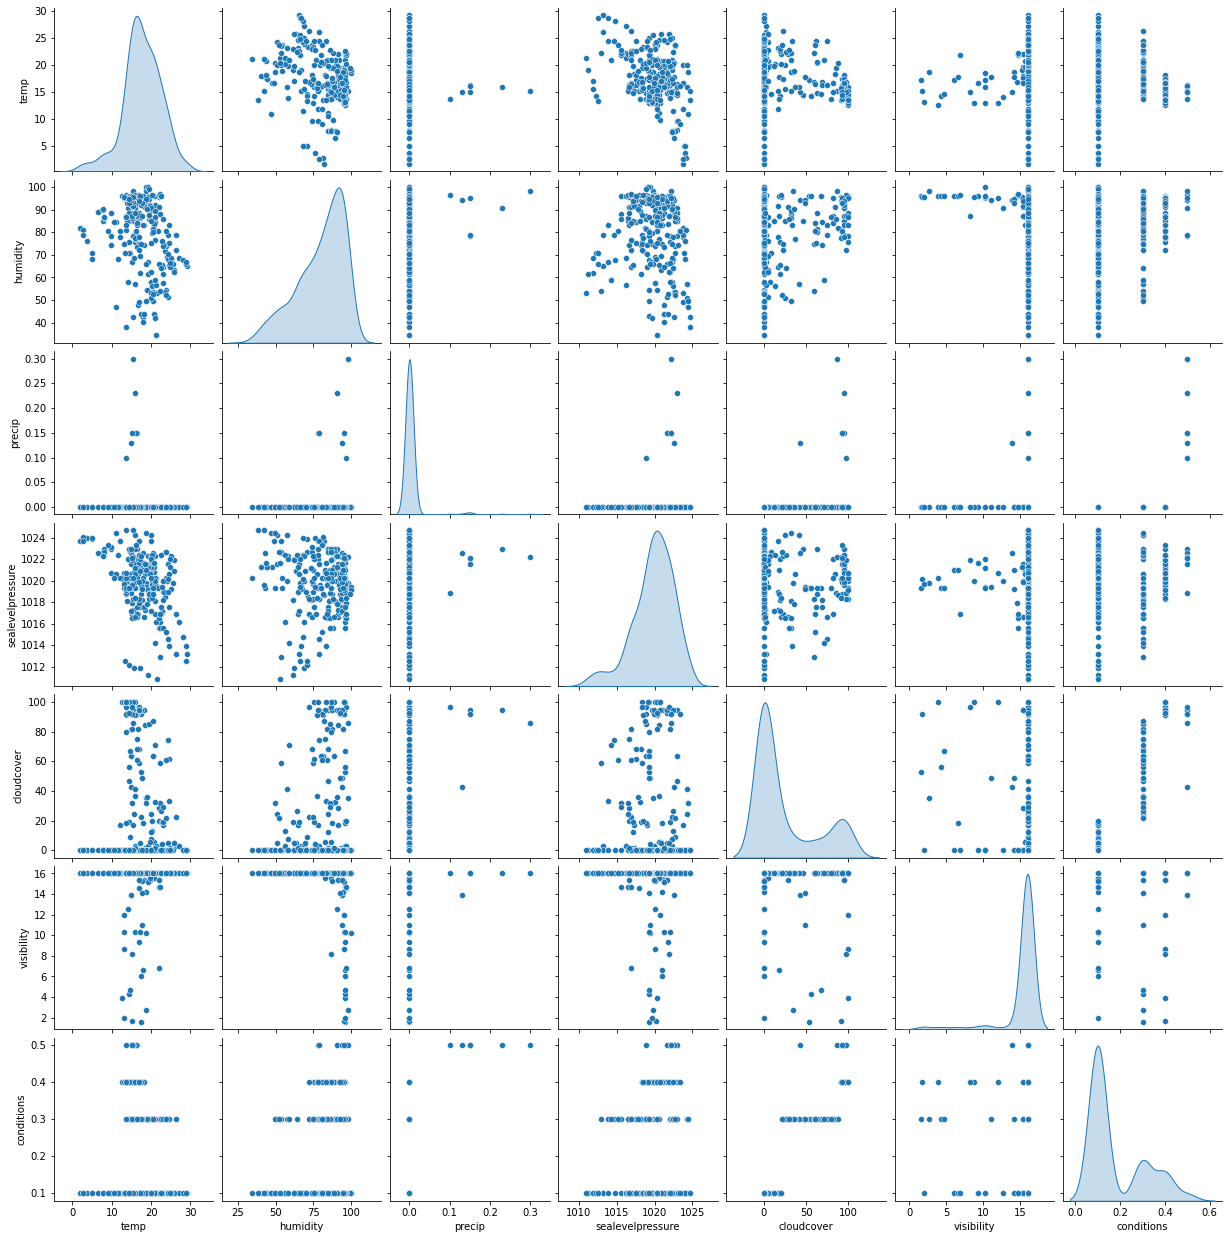

In [6]:
sns.pairplot(train_dataset[['temp', 'humidity', 'precip', 'sealevelpressure', 'cloudcover', 'visibility', 'conditions']], diag_kind='kde')

Analizziamo dei vari dati il numero di valori, la media, la deviazione standard e il massimo.

In [7]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lanciato,250.0,1.016000,0.125727,1.00,1.000,1.00,1.0000,2.0
temp,250.0,17.671200,4.774948,1.80,15.125,17.35,20.9000,29.2
humidity,250.0,79.742080,15.439877,34.41,69.240,84.30,92.9075,100.0
precip,248.0,0.004879,0.030608,0.00,0.000,0.00,0.0000,0.3
windspeed,250.0,12.096800,6.143301,0.00,8.125,11.35,16.2000,28.6
winddir,250.0,212.739600,119.563458,0.00,140.000,220.50,322.0000,360.0
sealevelpressure,250.0,1019.810000,2.702955,1010.90,1018.325,1020.20,1021.7000,1024.7
cloudcover,250.0,24.015600,36.081626,0.00,0.000,0.00,42.5500,100.0
visibility,250.0,15.227200,2.600321,1.60,16.000,16.00,16.0000,16.0
conditions,250.0,0.181600,0.124755,0.10,0.100,0.10,0.3000,0.5


Si può notare come i dati siano abbastanza diversi gli uni dagli altri: è quindi necessario normalizzare i dati.

In [8]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [10]:
normalizer.adapt(np.array(lanci_features))

In [11]:
print(normalizer.mean.numpy())

[[1.0192308e+00 8.0511147e+01           nan 1.2021476e+01 2.1451859e+02
  1.0197715e+03 2.5918591e+01 1.5162501e+01 1.8750001e-01]]


Per prima cosa creiamo un modello sequenziale.

Successivamente, eseguiamo una regressione lineare con una variabile: si prevederà la temperatura dalla velocità del vento.

In [12]:
winds = np.array(lanci_features['windspeed'])

winds_normalizer = layers.Normalization(input_shape=[1,], axis=None)
winds_normalizer.adapt(winds)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [13]:
winds_model = tf.keras.Sequential([
    winds_normalizer,
    layers.Dense(units=1)
])

winds_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [14]:
winds_model.predict(winds[:10])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[-2.0389345 ],
       [-0.8856023 ],
       [-0.30893618],
       [-0.74991614],
       [-0.15628915],
       [-1.2078569 ],
       [-0.42766154],
       [-0.46158302],
       [-0.32589686],
       [-0.3428577 ]], dtype=float32)

In [15]:
winds_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [16]:
%%time
history = winds_model.fit(
    lanci_features['windspeed'],
    lanci_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/8 [==>...........................] - ETA: 2s - loss: 17.1856WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fa296dd7320> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full out

Verifichiamo il livello di apprendimento dell'algoritmo.

Dal grafico si può notare come l'errore diminuisca nel tempo.

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.062715,5.062521,95
96,3.060592,5.026201,96
97,3.063403,4.979138,97
98,3.060818,4.998090,98
99,3.063772,5.007638,99


In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 30])
  plt.xlabel('Epoch')
  plt.ylabel('Error [temp]')
  plt.legend()
  plt.grid(True)

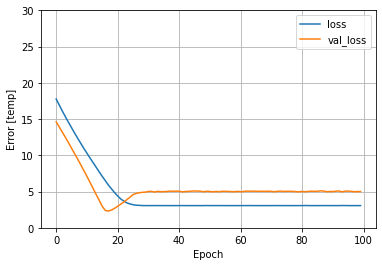

In [19]:
plot_loss(history)

Infine, esponiamo i risultati finali mediante un grafico: la retta rappresenta la predizione dell'algoritmo, i punti i dati analizzati.

In [20]:
test_results = {}

test_results['winds_model'] = winds_model.evaluate(
    lanci_features['windspeed'],
    lanci_labels, verbose=1)

10/10 [==============================] - 0s 3ms/step - loss: 3.4543


In [21]:
x = tf.linspace(0.0, 30, 100)
y = winds_model.predict(x)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [22]:
def plot_winds(x, y):
  plt.scatter(lanci_features['windspeed'], lanci_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('windspeed')
  plt.ylabel('temp')
  plt.legend()

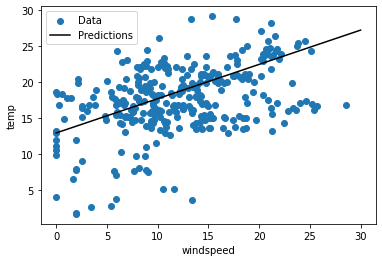

In [23]:
plot_winds(x, y)